In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sklearn

In [2]:
start ='2012-01-01'
end='2024-11-21'
stock='MSFT'
data= yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,MSFT,MSFT,MSFT,MSFT,MSFT
0,2012-01-03,21.077831,21.227430,20.778631,20.904609,64731500
1,2012-01-04,21.573875,21.628991,21.085708,21.117202,80516100
2,2012-01-05,21.794340,21.833708,21.487267,21.558129,56081400
3,2012-01-06,22.132910,22.195899,21.676237,21.676237,99455500
4,2012-01-09,21.841578,22.125030,21.825830,22.085661,59706800
...,...,...,...,...,...,...
3238,2024-11-14,425.184692,426.459578,418.322202,423.302228,30246900
3239,2024-11-15,413.342194,421.111023,411.987641,418.142946,28247600
3240,2024-11-18,414.099152,416.728590,410.453769,413.212692,24742000


**TAKING THE MOVING AVARAGE OF 100 DAYS**

In [5]:
ma_100_days=data.Close.rolling(100).mean()

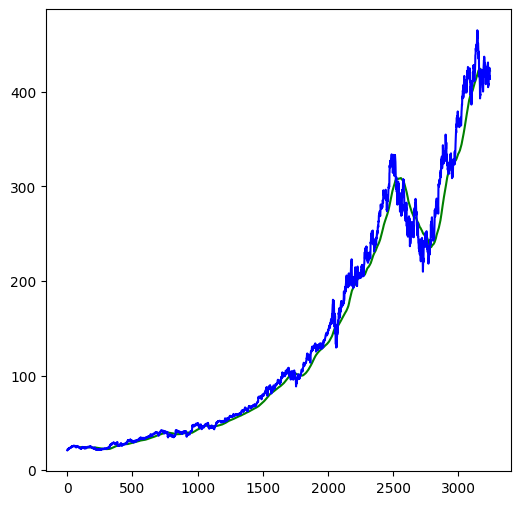

In [6]:
plt.figure(figsize=(6,6))
plt.plot(ma_100_days,'g')
plt.plot(data.Close,'b')
plt.show()

**TAKING THE MOVING AVARAGE OF 200 DAYS ALONG WITH 100 DAYS**

In [7]:
ma_200_days=data.Close.rolling(200).mean()

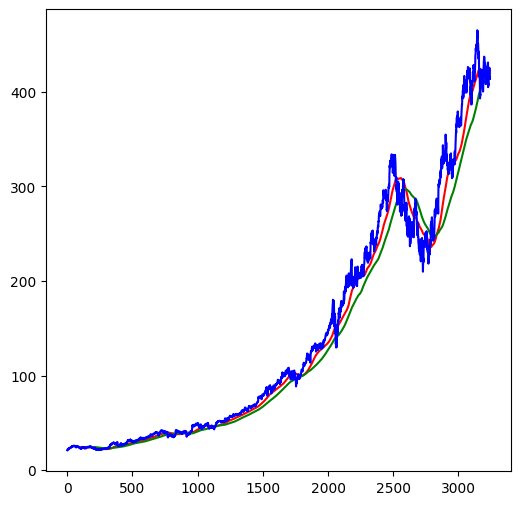

In [8]:
plt.figure(figsize=(6,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'g')
plt.plot(data.Close,'b')
plt.show()

**TAKING THE MOVING AVARAGE OF 400 DAYS**

In [9]:
ma_400_days=data.Open.rolling(400).mean()

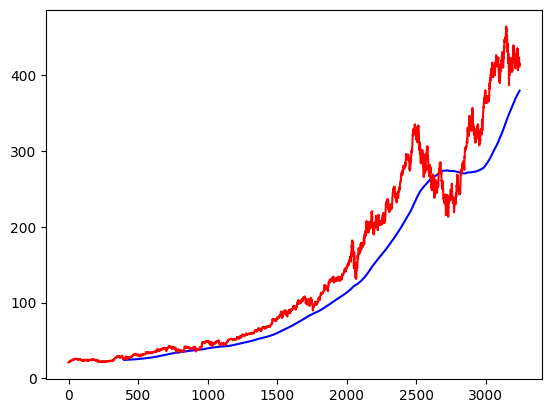

In [10]:
plt.plot(ma_400_days,'b')
plt.plot(data.Open,'r')
plt.show()

**DROPPING THE NULL VALUES**

In [11]:
data.dropna(inplace=True)

**DEVIDING THE DATA IN TO TRAIN AND TEST DATA**

In [12]:
data_train= pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test= pd.DataFrame(data.Close[ int(len(data)*0.80):len(data)])

In [13]:
data_train.shape[0]

2594

In [14]:
data_test.shape[0]

649

**TAKING MIN MAX SCALLER FOR SCALLING THE DATA**

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))#here fitiing the data between 1 and 0 using mean max scaler

In [16]:
data_train_scale=scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):#slicing from 1st day to 100th day for prediction of 101th day
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [18]:
x,y=np.array(x),np.array(y)#converting the two data two numpy arrays

**IMPORTING LSTM MODEL**

In [19]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

**LAYERING THE DATA**

In [20]:
model=Sequential()

#here total 4 LSTM layers are created
#relu : it is a nural network parametre which is passed to calculate the rnn nural network
#return_sequence:it is the rpocess of connecting one layer's output to the another layer's input
#Dropout:if we will go only in the training data set our model eill be fitted so tightly so it may not give the accurate output.
#that's why dropout is taken to drop some of the data after each training

model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))#here it is holding 50 nerulas
# 0.2 = 20%

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))#here it is holding 60 layer and so on

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))
#as we are going to predict the closing price of the stock we need to give one output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer='adam',loss ='mean_squared_error')


**MODEL TRAINING**

In [23]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 15s 156ms/step - loss: 0.0500
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - loss: 0.0050
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - loss: 0.0053
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - loss: 0.0033
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - loss: 0.0035
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 167ms/step - loss: 0.0039
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - loss: 0.0040
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 163ms/step - loss: 0.0041
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 159ms/step - loss: 0.0038
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 157ms/step - loss: 0.0035
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - loss: 0.0034
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 164ms/step - loss: 0.0036
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - loss: 0.0041
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - loss: 0.0028
Epoch 15/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days=data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [27]:
data_test_scaler = scaler.fit_transform(data_test)

In [28]:
x=[]
y=[]
for i in range(100,data_test_scaler.shape[0]):
    x.append(data_test_scaler[i-100:i])
    y.append(data_test_scaler[i,0])
x,y=np.array(x),np.array(y)

In [29]:
y_predict=model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [30]:
scale=1/scaler.scale_

In [31]:
scale=1/scaler.scale_

In [32]:
y_predict=y_predict*scale

In [33]:
y=y*scale


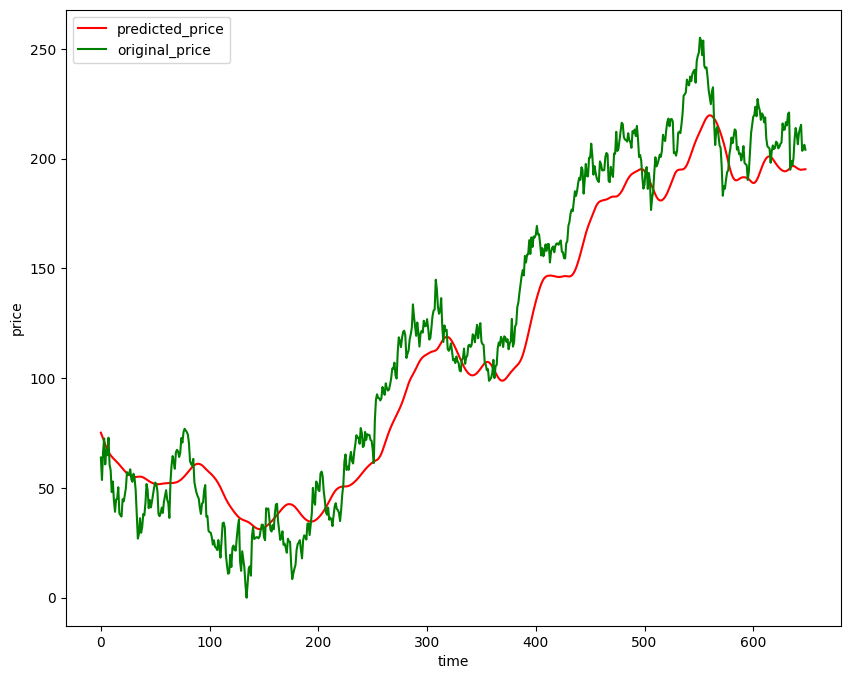

In [34]:
plt.figure(figsize=(10 ,8))
plt.plot(y_predict,'r',label='predicted_price') # Slice y_predict to get a 1D array
plt.plot(y,'g',label='original_price') # Use original y values
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [36]:
import joblib

# Save the model
joblib.dump(model, "stock_prediction.pkl")


['stock_prediction.pkl']

In [37]:
# Ensure MinMaxScaler is applied (rescale test data)
data_test_scaled = scaler.transform(data_test)

# Prepare test data (X_test) similar to how X_train was created
X_test = []
for i in range(100, len(data_test_scaled)):  # Use the last 100 days to predict the next day
    X_test.append(data_test_scaled[i-100:i])

# Convert list to numpy array
X_test = np.array(X_test)

# Reshape for LSTM: (samples, timesteps, features)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Ensure model is loaded if needed
import joblib
model = joblib.load("stock_prediction.pkl")  # Load model if kernel restarted

# Predict
y_pred = model.predict(X_test)

# Rescale predictions back to the original scale
y_pred = y_pred * (1 / scaler.scale_)

# Print first few predicted values
print(y_pred[-3:-1])


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step
[[195.06063295]
 [195.1345536 ]]


**GETTING ACCURACY MATRICS**

y_pred shape: (649, 1)
y shape: (649,)
Model Performance Metrics:
Mean Absolute Error (MAE): 15.8960
Root Mean Squared Error (RMSE): 18.6986
R² Score: 0.9336


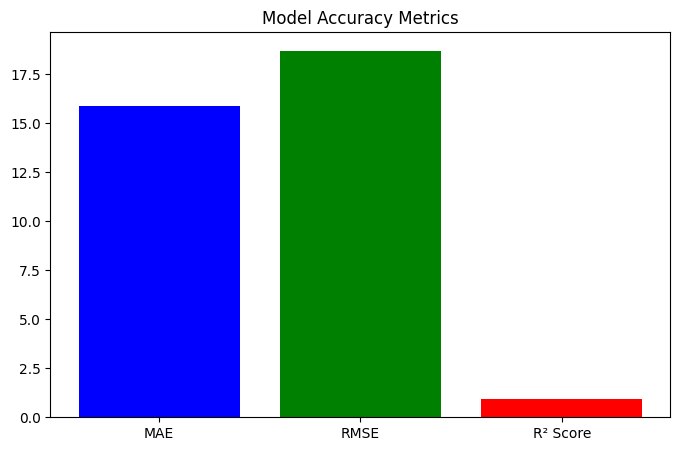

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure 'y_pred' and 'y' exist
print(f"y_pred shape: {y_pred.shape}")
print(f"y shape: {y.shape}")

# Calculating the errors
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print accuracy metrics
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualize Errors
plt.figure(figsize=(8, 5))
plt.bar(["MAE", "RMSE", "R² Score"], [mae, rmse, r2], color=['blue', 'green', 'red'])
plt.title("Model Accuracy Metrics")
plt.show()


In [ ]:
#from google.colab import files
#files.download("stock_prediction.pkl")


**PREDICTING FUTURE DAYS PRICE BASED ON PREVIOUS DATA**

In [41]:
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from datetime import timedelta

# Assuming 'model' is defined somewhere in your code
def predict_stock_price(stock_symbol, start_date, end_date, future_days=0):
    """Predicts stock prices for a given date range and future days."""
    # Fetch stock data
    data = yf.download(stock_symbol, start=start_date, end=end_date)

    if data.empty:
        print("No data available for the given stock and date range.")
        return

    # Preprocess data
    data_train = data["Close"].values.reshape(-1, 1)

    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data_train)

    # Prepare test data
    X_test = []
    for i in range(100, len(data_scaled)):
        X_test.append(data_scaled[i-100:i])

    if not X_test:
        print("Not enough historical data for prediction.")
        return

    X_test = np.array(X_test)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Predict stock price for given date range
    y_pred = model.predict(X_test)

    # Reverse scaling
    y_pred = y_pred * (1 / scaler.scale_)

    # Print predicted prices
    predicted_dates = data.index[100:]  # Corresponding dates for predictions
    print("Predicted Stock Prices:")
    for date, price in zip(predicted_dates, y_pred):
        print(f"Predicted price on {date.date()}: ${price[0].item():.2f}")  # Extract scalar value

    # Predict future stock prices if future_days > 0
    if future_days > 0:
        last_100_days = data_scaled[-100:]
        future_predictions = []

        for _ in range(future_days):
            input_data = last_100_days.reshape(1, 100, 1)
            future_price = model.predict(input_data)[0][0]

            # Reverse scale
            future_price_real = future_price * (1 / scaler.scale_)
            future_predictions.append(future_price_real)

            # Update last_100_days with new prediction
            last_100_days = np.append(last_100_days[1:], future_price).reshape(100, 1)

        print("\nPredicted Future Stock Prices:")
        future_dates = [data.index[-1] + timedelta(days=i) for i in range(1, future_days + 1)]
        for date, price in zip(future_dates, future_predictions):
            print(f"Predicted price on {date.date()}: ${price.item():.2f}")  # Extract scalar value

# Get user input
stock_symbol = input("Enter Stock Symbol (e.g., MSFT): ").upper()
start_date = input("Enter Start Date (YYYY-MM-DD): ")
end_date = input("Enter End Date (YYYY-MM-DD): ")
future_days = int(input("Enter number of future days to predict: "))

# Run prediction
predict_stock_price(stock_symbol, start_date, end_date, future_days)


Enter Stock Symbol (e.g., MSFT): TSLA
Enter Start Date (YYYY-MM-DD): 2015-04-23
Enter End Date (YYYY-MM-DD): 2025-02-15
Enter number of future days to predict: 18


[*********************100%***********************]  1 of 1 completed

 3/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step

75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step
Predicted Stock Prices:
Predicted price on 2015-09-15: $32.10
Predicted price on 2015-09-16: $32.10
Predicted price on 2015-09-17: $32.11
Predicted price on 2015-09-18: $32.12
Predicted price on 2015-09-21: $32.15
Predicted price on 2015-09-22: $32.18
Predicted price on 2015-09-23: $32.21
Predicted price on 2015-09-24: $32.26
Predicted price on 2015-09-25: $32.31
Predicted price on 2015-09-28: $32.36
Predicted price on 2015-09-29: $32.42
Predicted price on 2015-09-30: $32.47
Predicted price on 2015-10-01: $32.52
Predicted price on 2015-10-02: $32.57
Predicted price on 2015-10-05: $32.61
Predicted price on 2015-10-06: $32.64
Predicted price on 2015-10-07: $32.67
Predicted price on 2015-10-08: $32.68
Predicted price on 2015-10-09: $32.69
Predicted price on 2015-10-12: $32.68
Predicted price on 2015-10-13: $32.66
Predicted price on 2015-10-14: $32.63
Predicted price on 2015-10-15: $32.58
Predicted price on 2015-10-16: $32.52
Predicted price on 2015-